In [5]:
# conda install pandas, numpy, matplotlib, seaborn, sklearn

In [ ]:
# conda install pandas
# conda install numpy 
# conda install matplotlib
# conda install seaborn
# conda install --no-deps scikit-learn
# conda install joblib

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk

In [23]:
# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')


# id 는 제외하고 분석합니다.
train_data = train_data.drop('id', axis=1)
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.
display(train_data.head(3)) # 데이터를 확인합니다.

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1


In [26]:
# categoric 필드와 numeric 필드를 구분합니다
cols_categorical = ["Gender","Customer Type","Type of Travel","Class"]
cols_numerical = list(filter(lambda x : not x in ['id',*cols_categorical],list(train_data.columns)))
print(f"categorical\t: {cols_categorical}")
print(f"numerical\t: {cols_numerical}")

# categoric 필드와 numeric 필드를 구분합니다
for colName in cols_categorical:
    train_data[colName] = train_data[colName].astype('category')
    test_data[colName] = test_data[colName].astype('category')

# categoric 필드에 속한 값을 확인합니다.
print("\nCheck categories")
for col in cols_categorical: 
    print(col, list(train_data[col].cat.categories), sep="\t: ")

categorical	: ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical	: ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']

Check categories
Gender	: ['Female', 'Male']
Customer Type	: ['Loyal Customer', 'disloyal Customer']
Type of Travel	: ['Business travel', 'Personal Travel']
Class	: ['Business', 'Eco', 'Eco Plus']


In [37]:
print("결측값 개수 확인")
display(train_data.isnull().sum().loc[lambda x : x>0]) # 항목별 결측값 수
display(test_data.isnull().sum().loc[lambda x : x>0]) # 항목별 결측값 수
print("결측값이 존재하지 않는 데이터입니다.")

결측값 개수 확인


Series([], dtype: int64)

Series([], dtype: int64)

결측값이 존재하지 않는 데이터입니다.


In [38]:
# 기초 통계량을 살펴봅니다.
train_data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [40]:
# 전체의 데이터 타입을 확인합니다
train_data.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Seat comfort                            int64
Departure/Arrival time convenient       int64
Food and drink                          int64
Gate location                           int64
Inflight wifi service                   int64
Inflight entertainment                  int64
Online support                          int64
Ease of Online booking                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Cleanliness                             int64
Online boarding                         int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

/opt/Anaconda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/Anaconda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/Anaconda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/Anaconda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


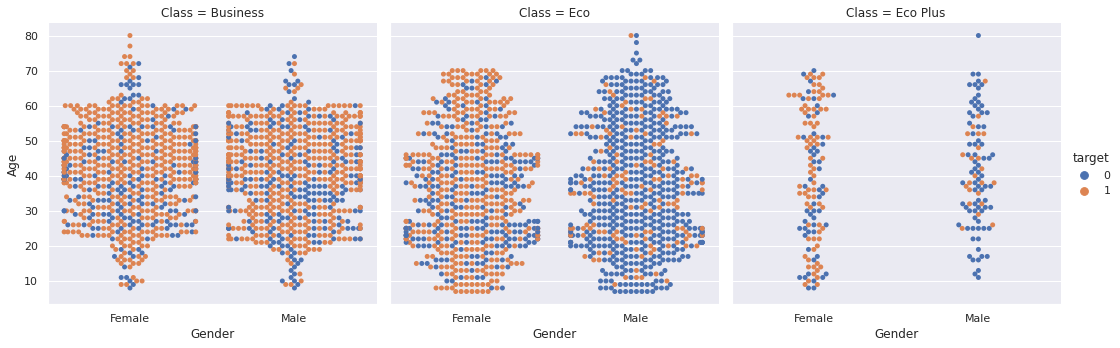

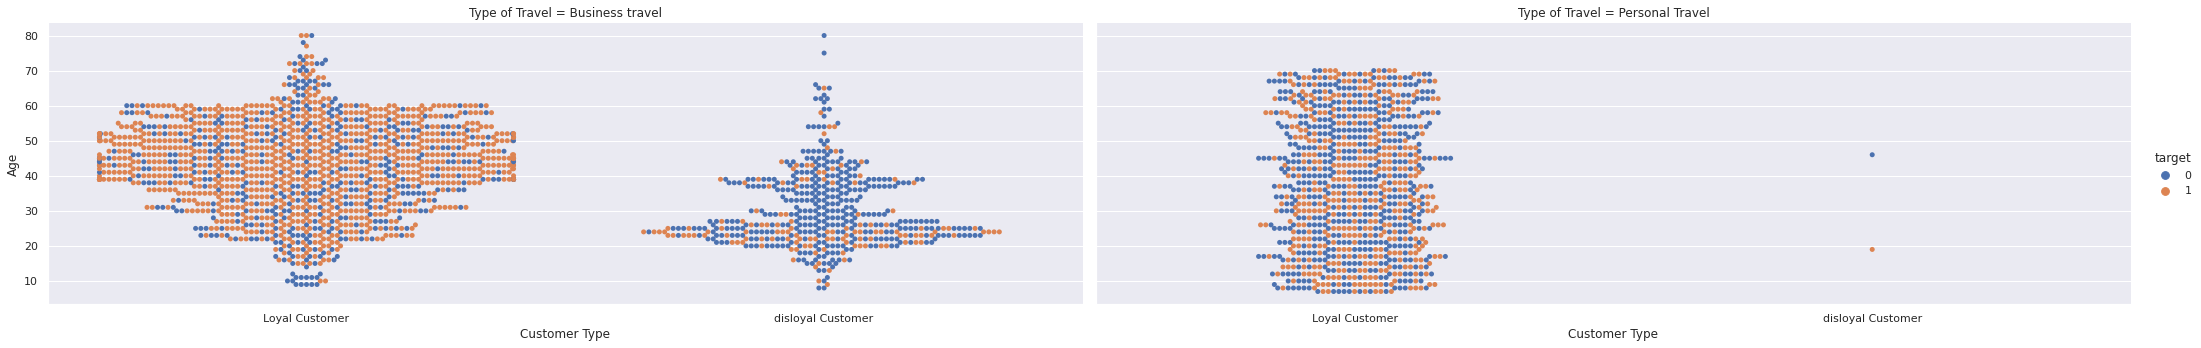

In [65]:

cols_categorical = ["Gender","Customer Type","Type of Travel","Class"]


sns.catplot(x="Gender", y="Age", col="Class", hue="target",
            kind="swarm", data=train_data)

sns.catplot(x="Customer Type", y="Age", col="Type of Travel", hue="target",
            aspect=3,
            kind="swarm", data=train_data)